In [1]:
#Nayan Rathi
#LGM-VIP Data Science Task 1

In [2]:
import numpy as np #linear algebra
import pandas as pd # a data processing and CSV I/O library

import warnings # current version of seaborn generates a bunch of warnings that will be ignore
warnings.filterwarnings('ignore')

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)

# Model Evaluation
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [3]:
df=pd.read_csv("/content/Iris.csv")

In [5]:
df.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [6]:
df.shape

(150, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.describe()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000

In [8]:
df.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [9]:
df.tail()

Id  SepalLengthCm  ...  PetalWidthCm         Species
145  146            6.7  ...           2.3  Iris-virginica
146  147            6.3  ...           1.9  Iris-virginica
147  148            6.5  ...           2.0  Iris-virginica
148  149            6.2  ...           2.3  Iris-virginica
149  150            5.9  ...           1.8  Iris-virginica

[5 rows x 6 columns]

In [10]:
df['SepalWidthCm'].value_counts()

3.0    26
2.8    14
3.2    13
3.4    12
3.1    12
2.9    10
2.7     9
2.5     8
3.5     6
3.8     6
3.3     6
2.6     5
2.3     4
3.6     3
2.4     3
2.2     3
3.7     3
3.9     2
4.2     1
4.1     1
4.4     1
2.0     1
4.0     1
Name: SepalWidthCm, dtype: int64

In [11]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [13]:
n = len(df[df['Species'] == 'Iris-versicolor'])
print("No of Versicolor in Dataset:",n)

No of Versicolor in Dataset: 50


In [14]:
n1 = len(df[df['Species'] == 'Iris-virginica'])
print("No of Virginica in Dataset:",n1)

No of Virginica in Dataset: 50


In [15]:
n2 = len(df[df['Species'] == 'Iris-setosa'])
print("No of Setosa in Dataset:",n2)

No of Setosa in Dataset: 50


In [16]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [17]:
df.corr()

Id  SepalLengthCm  ...  PetalLengthCm  PetalWidthCm
Id             1.000000       0.716676  ...       0.882747      0.899759
SepalLengthCm  0.716676       1.000000  ...       0.871754      0.817954
SepalWidthCm  -0.397729      -0.109369  ...      -0.420516     -0.356544
PetalLengthCm  0.882747       0.871754  ...       1.000000      0.962757
PetalWidthCm   0.899759       0.817954  ...       0.962757      1.000000

[5 rows x 5 columns]

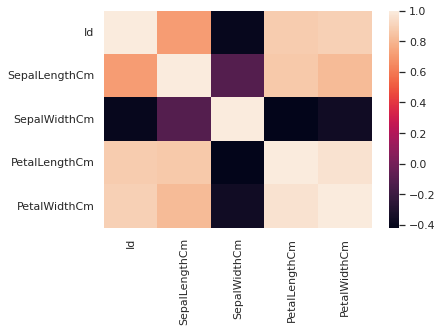

In [18]:
sns.heatmap(df.corr())

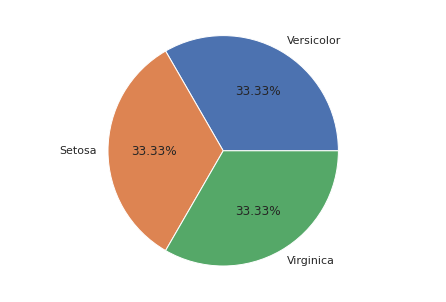

In [19]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['Versicolor', 'Setosa', 'Virginica']
s = [50,50,50]
ax.pie(s, labels = l,autopct='%1.2f%%')

plt.show()

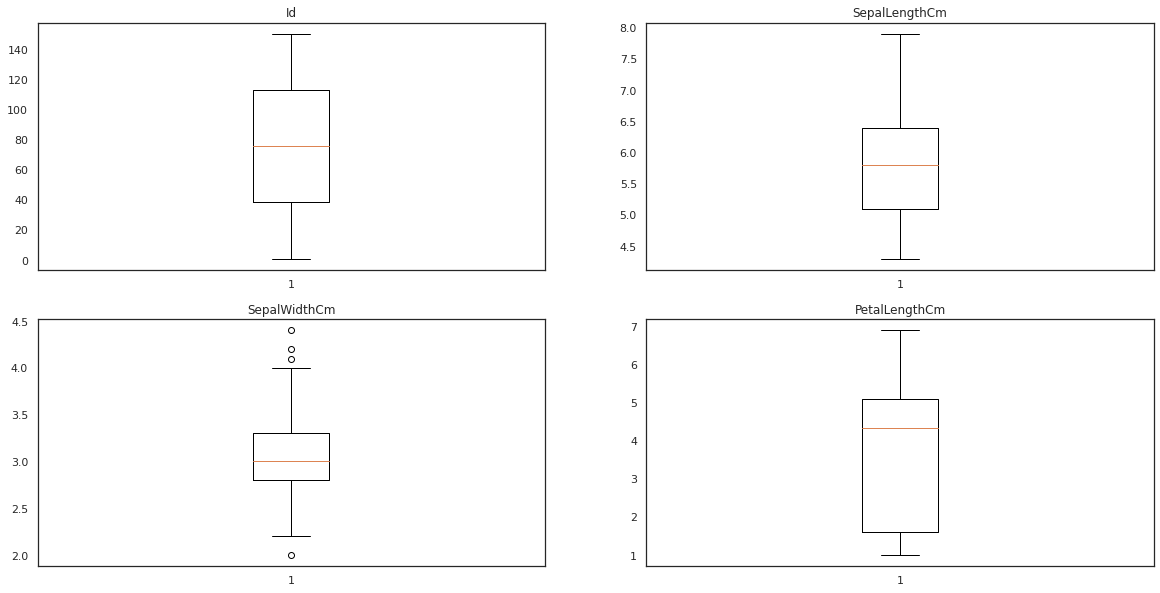

In [30]:
# Checking outliers
rows = 2
cols = 2
fig, axs = plt.subplots(rows,cols)
index=-1
for i in range(rows):
  for j in range(cols):
    index+=1
    axs[i,j].boxplot(df[df.columns[index]])
    axs[i,j].set_title(df.columns[index])
fig.set_size_inches(20,10)
fig.show()   

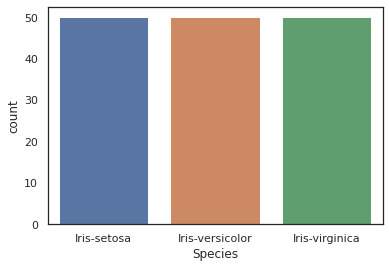

In [31]:
sns.countplot(df['Species'])

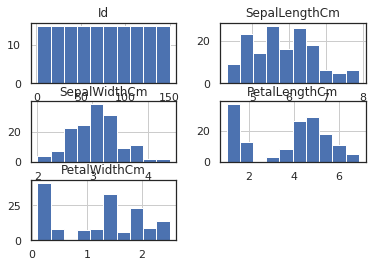

In [32]:
df.hist()
plt.show()

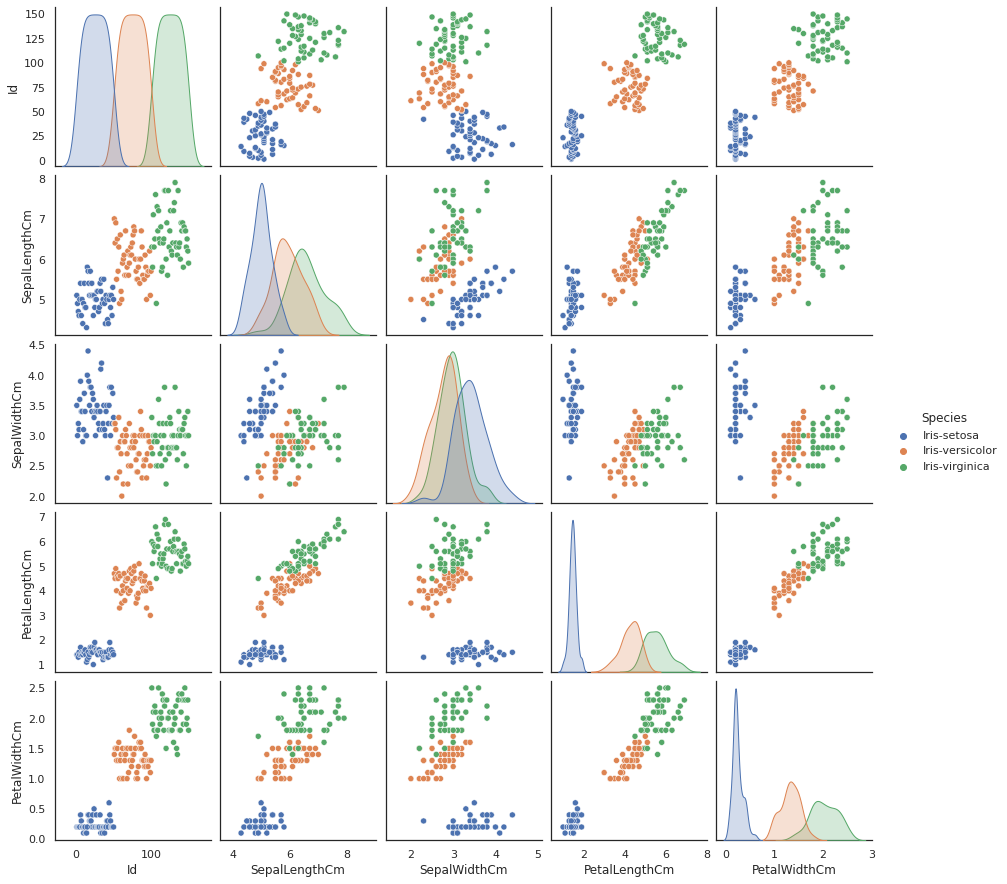

In [33]:
sns.pairplot(df,hue='Species');

In [34]:
train, test = train_test_split(df, test_size = 0.25)
print(train.shape)
print(test.shape)

(112, 6)
(38, 6)


In [43]:
train_X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm',
                 'PetalWidthCm']]
train_y = df.Species

test_X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm',
                 'PetalWidthCm']]
test_y = df.Species

In [44]:
train_X.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2

In [45]:
test_y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [46]:
#Using LogisticRegression
model = LogisticRegression()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('Accuracy:',metrics.accuracy_score(prediction,test_y))

Accuracy: 0.9733333333333334


In [47]:
#Using Support Vector
from sklearn.svm import SVC
model1 = SVC()
model1.fit(train_X,train_y)

pred_y = model1.predict(test_X)

from sklearn.metrics import accuracy_score
print("Acc=",accuracy_score(test_y,pred_y))

Acc= 0.9733333333333334


In [48]:
#Using KNN Neighbors
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(train_X,train_y)
y_pred2 = model2.predict(test_X)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(test_y,y_pred2))

Accuracy Score: 0.9666666666666667


In [49]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','Support Vector Machines','KNN'],
    'Score': [0.97,0.97,0.96]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

Model
Score                         
0.97       Logistic Regression
0.97   Support Vector Machines
0.96                       KNN